# Machine Learning Data

---

Now, we are going to apply some ML algorithms on lightcurves contained: 

- 0: Confirmed Exoplanets
- 1: Eclipsing Binaries
- 2: Non Eclipsed

With that in mind, the data from (1) and (2) will be downloaded from the [CoRoT Public Archive](http://idoc-corot.ias.u-psud.fr/sitools/client-user/COROT_N2_PUBLIC_DATA/project-index.html) and transformed into CSV files, just like we did for (0): Confirmed Exoplanets on `01 - Manipulating fits files`

# SkTime

In [ ]:
import pandas as pd
import numpy as np
import os

!pip install control
from tools import *

## Preprocessing data 

###  Creating matrix of features (CoRoT targets with confirmed exoplanets)


In [ ]:
# DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'
# DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files'
DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/resampled_files'

In [ ]:
X = pd.DataFrame()

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != ('desktop.ini' and 'csv_files.rar'):
            # File path
            path = root_dir_path + "/" + files[j] 
            
            # Reading data
            # print(path)
            data = pd.read_csv(path)
            flux = data.WHITEFLUX
            
            # Add timeseries to pd.DataFrame
            X = X.append([[flux]], ignore_index=True)

In [ ]:
X.columns = ['time_series']
X.head()

In [ ]:
X.iloc[0][0]

In [ ]:
X.shape

### Labeling matrix of features

- 0: confirmed_exoplanets
- 1: eclipsing_binaries
- 2: none

In [ ]:
labels = np.zeros(X.size, dtype='int')
labels

In [ ]:
y = pd.Series(labels)
y.head()

In [ ]:
y.shape

### Creating dataset, X and y

In [ ]:
# Creating pd.DataFrame with X data, and setted columns
df = pd.DataFrame(X, columns=['time_series', 'label'])

# Adding labels
df.label = y

df.head()

How many Labels we got ?

In [ ]:
labels, counts = np.unique(y, return_counts=True)
print('Labels =', labels, '\nCounts =', counts)

## Machine Learning - SkTime

https://github.com/alan-turing-institute/sktime/tree/v0.4.3

https://github.com/alan-turing-institute/sktime/blob/main/sktime/classification/compose/__init__.py

### **Preliminaries**

In [ ]:
# !pip install sktime[all_extras]

### **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 1) (24,) (9, 1) (9,)


### **Time Series Classification**


https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55

In [ ]:
from sktime.classification.all import TimeSeriesForestClassifier

classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)

TimeSeriesForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### **Feature extraction**

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [ ]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

transformer = TSFreshFeatureExtractor(default_fc_parameters="minimal")

extracted_features = transformer.fit_transform(X_train)
extracted_features.head()


Feature Extraction: 100%|██████████| 5/5 [00:00<00:00, 18.29it/s]


time_series__sum_values  ...  time_series__minimum
0              2.124862e+09  ...         138999.945791
4              6.136100e+08  ...          39239.685767
16             6.258849e+08  ...          40477.653465
5              4.512183e+09  ...         297465.565232
13             5.857504e+08  ...          37855.665849

[5 rows x 9 columns]

In [ ]:
# If the result is 1, it means that the entire dataset has de same lenght

extracted_features.time_series__length.nunique()

1

### **Time Series Classification with Feature Extraction**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

classifier = make_pipeline(
    TSFreshFeatureExtractor(show_warnings=False), RandomForestClassifier()
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)


Feature Extraction: 100%|██████████| 5/5 [07:48<00:00, 93.60s/it]

Feature Extraction: 100%|██████████| 5/5 [02:50<00:00, 34.17s/it]


1.0

# SkLearn

In [ ]:
import pandas as pd
import numpy as np
import os

!pip install control
from tools import *

## Preprocessing data

###  Creating matrix of features (CoRoT targets with confirmed exoplanets)


In [ ]:
# DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'
# DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files'
DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/resampled_files'

In [ ]:
X = pd.DataFrame()

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != ('desktop.ini' and 'csv_files.rar'):
            # File path
            path = root_dir_path + "/" + files[j] 
            
            # Reading data
            # print(path)
            data = pd.read_csv(path)
            flux = data.WHITEFLUX
            
            # Add timeseries to pd.DataFrame
            X = X.append(flux, ignore_index=True)

In [ ]:
X.head()

0             1      ...         15048         15049
0  1.411572e+05  1.412424e+05  ...  1.412287e+05  1.413100e+05
1  2.605181e+04  2.611330e+04  ...  2.629231e+04  2.618336e+04
2  1.298393e+06  1.299550e+06  ...  1.295069e+06  1.294454e+06
3  1.125213e+05  1.127580e+05  ...  1.124471e+05  1.123491e+05
4  4.064368e+04  4.024597e+04  ...  4.269699e+04  4.274217e+04

[5 rows x 15050 columns]

In [ ]:
X.shape

(33, 15050)

### Labeling matrix of features

- 0: confirmed_exoplanets
- 1: eclipsing_binaries
- 2: none

In [ ]:
labels = np.zeros(X.size, dtype='int')
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = pd.Series(labels)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
y.shape

(496650,)

### Creating dataset, X and y

In [ ]:
# Creating pd.DataFrame with X data, and setted columns
df = pd.DataFrame(X)

# Adding labels
df['label'] = y

df.sample(5)

0              1  ...          15049  label
7    30819.826000   30766.330239  ...   30923.186993      0
0   141157.216020  141242.434636  ...  141309.960163      0
28   62789.448650   63084.529078  ...   62690.144817      0
16   41432.330660   41693.673194  ...   40791.714704      0
8    75697.102041   75521.999008  ...   76313.579812      0

[5 rows x 15051 columns]

How many Labels we got ?

In [ ]:
labels, counts = np.unique(y, return_counts=True)
print('Labels =', labels, '\nCounts =', counts)

Labels = [0] 
Counts = [496650]


## Machine Learning

### **Preliminaries**

### **Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 15050) (24,) (9, 15050) (9,)


### **Time Series Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# from sklearn import svm
# classifier = svm.SVC()

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9]]


1.0

# Decision Trees - 0.57

---

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Feature: Periodograms

In [ ]:
import pandas as pd

FEATURES_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/features'
PERIODOGRAMS_DIR = FEATURES_DIR + '/feature_periodograms.csv'

data = pd.read_csv(PERIODOGRAMS_DIR)
data.sample(5)

0             1  ...          7525  label
127  1.771419e-21  3.118507e+10  ...  6.918270e+02      1
92   3.003987e-22  2.193934e+10  ...  3.447603e+00      1
112  6.085895e-23  2.508199e+10  ...  7.252327e+02      1
18   7.520660e-23  6.582516e+10  ...  4.999322e+06      0
35   2.005767e-23  2.483386e+11  ...  4.098014e+06      1

[5 rows x 7527 columns]

In [ ]:
X = data.iloc[:, :-1].values # Matrix of features (Independent variable), X: numpy.ndarray
y = data.iloc[:, -1].values  # Dependent variable vector, y: numpy.ndarray

### Preprocessing

**1. Normalization**

In [ ]:
from sklearn import preprocessing

normalized_data = preprocessing.normalize(X)

**2. PCA - Dimensionality Reduction**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# What is the minimun value of `n_components` to keep 95% of variance on data ?

pca = PCA()
pca.fit(normalized_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("The minimun value is:", d)

The minimun value is: 49


In [ ]:
pca = PCA(n_components=d)
pca.fit(normalized_data)
X_reduced = pca.transform(normalized_data)

Best altenative... set the `n_components` to fluctuate between 0.0 and 1.0, indicating the rate of variance you want to preserve

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(normalized_data)

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(98, 49) (98,) (33, 49) (33,)


### Train model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class_trees = DecisionTreeClassifier(random_state=42)
class_trees.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Results


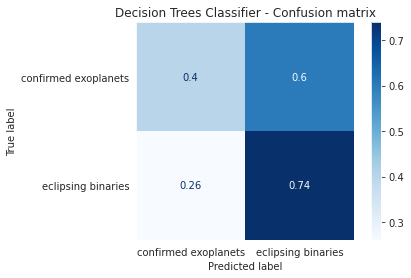

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

labels_formated = ['confirmed exoplanets', 'eclipsing binaries']

fig = plot_confusion_matrix(class_trees, X_test, y_test,
                             display_labels=labels_formated,
                             cmap=plt.cm.Blues,
                             normalize='true')

fig.ax_.set_title('Decision Trees Classifier - Confusion matrix')
plt.show()

# XGBoost - 0.585

---

https://xgboost.readthedocs.io/en/latest/parameter.html

## Feature: Periodograms

In [ ]:
import pandas as pd

FEATURES_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/features'
PERIODOGRAMS_DIR = FEATURES_DIR + '/feature_periodograms.csv'

data = pd.read_csv(PERIODOGRAMS_DIR)
data.sample(5)

0             1             2  ...          7524          7525  label
97  6.567484e-24  1.178041e+10  5.298207e+09  ...  1.076458e+03  5.382289e+02      1
59  5.748580e-20  6.211685e+10  2.216964e+09  ...  2.414664e+04  1.207332e+04      1
24  1.752484e-21  9.756491e+10  3.995481e+10  ...  1.783050e+07  7.135303e+07      0
71  4.444052e-21  1.225255e+11  8.684239e+11  ...  3.042794e+04  1.521397e+04      1
32  4.534147e-21  4.810687e+11  7.156296e+11  ...  2.085868e+05  1.042934e+05      0

[5 rows x 7527 columns]

In [ ]:
X = data.iloc[:, :-1].values # Matrix of features (Independent variable), X: numpy.ndarray
y = data.iloc[:, -1].values  # Dependent variable vector, y: numpy.ndarray

### Preprocessing

**1. Normalization**

In [ ]:
from sklearn import preprocessing

normalized_data = preprocessing.normalize(X)

**2. PCA - Dimensionality Reduction**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# What is the minimun value of `n_components` to keep 95% of variance on data ?

pca = PCA()
pca.fit(normalized_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("The minimun value is:", d)

The minimun value is: 49


In [ ]:
pca = PCA(n_components=d)
pca.fit(normalized_data)
X_reduced = pca.transform(normalized_data)

Best altenative... set the `n_components` to fluctuate between 0.0 and 1.0, indicating the rate of variance you want to preserve

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(normalized_data)

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(98, 49) (98,) (33, 49) (33,)


### Train model

In [ ]:
import xgboost as xgb

class_xgb = xgb.XGBClassifier(learning_rate=0.3, max_depth=6, verbosity=0, random_state=42)

class_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

#### Results


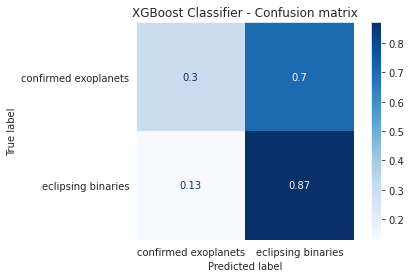

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

labels_formated = ['confirmed exoplanets', 'eclipsing binaries']

fig = plot_confusion_matrix(class_xgb, X_test, y_test,
                             display_labels=labels_formated,
                             cmap=plt.cm.Blues,
                             normalize='true')

fig.ax_.set_title('XGBoost Classifier - Confusion matrix')
plt.show()

# Gaussian Mixture Models

---

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

## Feature: Periodograms

In [ ]:
import pandas as pd

FEATURES_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/features'
PERIODOGRAMS_DIR = FEATURES_DIR + '/feature_periodograms.csv'

data = pd.read_csv(PERIODOGRAMS_DIR)
data.sample(5)

0             1             2  ...         7524         7525  label
121  3.099730e-21  1.450455e+11  5.851971e+10  ...  9970.341462  4985.170514      1
104  2.544691e-21  9.069646e+10  6.643117e+10  ...  2452.949928  1226.474910      1
83   7.221651e-21  4.505717e+08  7.566718e+06  ...   121.893442    60.946718      1
126  2.472828e-21  8.480713e+10  3.326409e+10  ...  8732.001415  4366.000517      1
13   1.750600e-22  7.424050e+09  1.358892e+09  ...    82.029903    41.014950      0

[5 rows x 7527 columns]

In [ ]:
X = data.iloc[:, :-1].values # Matrix of features (Independent variable), X: numpy.ndarray
y = data.iloc[:, -1].values  # Dependent variable vector, y: numpy.ndarray

### Preprocessing

**1. Normalization**

In [ ]:
from sklearn import preprocessing

normalized_data = preprocessing.normalize(X)

**2. PCA - Dimensionality Reduction**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# What is the minimun value of `n_components` to keep 95% of variance on data ?

pca = PCA()
pca.fit(normalized_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("The minimun value is:", d)

The minimun value is: 49


In [ ]:
pca = PCA(n_components=d)
pca.fit(normalized_data)
X_reduced = pca.transform(normalized_data)

Best altenative... set the `n_components` to fluctuate between 0.0 and 1.0, indicating the rate of variance you want to preserve

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(normalized_data)

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(98, 49) (98,) (33, 49) (33,)


### Train model

In [ ]:
# from sklearn.mixture import GaussianMixture

# classifier = GaussianMixture(n_components=2, random_state=42)

# classifier.fit(X_train, y_train)

#### Results


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix

# labels_formated = ['confirmed exoplanets', 'eclipsing binaries']

# fig = plot_confusion_matrix(classifier, X_test, y_test,
#                              display_labels=labels_formated,
#                              cmap=plt.cm.Blues,
#                              normalize='true')

# fig.ax_.set_title('Gaussian Mixture Classifier - Confusion matrix')
# plt.show()

# Lazy Predict 

---

https://lazypredict.readthedocs.io/en/latest/usage.html#classification

## Feature: Periodograms

In [1]:
import pandas as pd

FEATURES_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/features'
PERIODOGRAMS_DIR = FEATURES_DIR + '/feature_periodograms.csv'

data = pd.read_csv(PERIODOGRAMS_DIR)
data.sample(5)

0             1  ...          7525  label
20   5.244937e-22  1.656106e+11  ...  2.142671e+05      0
109  5.222241e-23  7.189921e+10  ...  5.866100e+06      1
12   1.741909e-23  7.970192e+09  ...  9.736221e+02      0
107  1.537079e-21  2.334249e+10  ...  3.806169e+00      1
90   1.676619e-22  6.268024e+10  ...  5.188833e+02      1

[5 rows x 7527 columns]

In [2]:
X = data.iloc[:, :-1].values # Matrix of features (Independent variable), X: numpy.ndarray
y = data.iloc[:, -1].values  # Dependent variable vector, y: numpy.ndarray

### Preprocessing

**1. Normalization**

In [3]:
from sklearn import preprocessing

normalized_data = preprocessing.normalize(X)

**2. PCA - Dimensionality Reduction**

In [4]:
import numpy as np
from sklearn.decomposition import PCA

# What is the minimun value of `n_components` to keep 95% of variance on data ?

pca = PCA()
pca.fit(normalized_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("The minimun value is:", d)

The minimun value is: 49


In [23]:
pca = PCA(n_components=d)
pca.fit(normalized_data)
X_reduced = pca.transform(normalized_data)

Best altenative... set the `n_components` to fluctuate between 0.0 and 1.0, indicating the rate of variance you want to preserve

In [25]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(normalized_data)

### Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(98, 49) (98,) (33, 49) (33,)


### Train model

In [ ]:
!pip install lazypredict

In [18]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:01<00:00, 24.28it/s]


#### Results


In [19]:
print(models.Accuracy.sort_values(ascending=False))

Model
QuadraticDiscriminantAnalysis   0.70
SVC                             0.70
AdaBoostClassifier              0.70
XGBClassifier                   0.70
ExtraTreesClassifier            0.70
RandomForestClassifier          0.70
CalibratedClassifierCV          0.70
KNeighborsClassifier            0.67
LGBMClassifier                  0.67
BaggingClassifier               0.67
NearestCentroid                 0.67
DecisionTreeClassifier          0.64
BernoulliNB                     0.64
GaussianNB                      0.64
DummyClassifier                 0.61
SGDClassifier                   0.58
LinearDiscriminantAnalysis      0.58
RidgeClassifier                 0.55
ExtraTreeClassifier             0.55
LogisticRegression              0.55
Perceptron                      0.52
PassiveAggressiveClassifier     0.52
LinearSVC                       0.52
RidgeClassifierCV               0.52
LabelSpreading                  0.33
LabelPropagation                0.33
Name: Accuracy, dtype: float64
